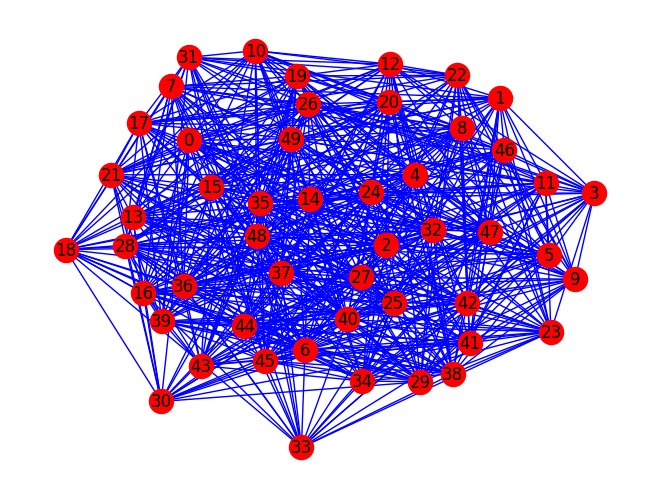

In [4]:
#importing the networkx library
import networkx as nx

#importing the matplotlib library for plotting the graph
import matplotlib.pyplot as plt
G= nx.erdos_renyi_graph(50,0.5)
nx.draw(G, with_labels=True,pos=nx.kamada_kawai_layout(G),edge_color='blue',node_color='red')
plt.show()

In [146]:
from math import exp
import numpy as np
#Case1:
n=10
a=[0]*10
b=[0]*10
r=0
t=-0.69
m=np.array([[exp(r+2*t+a[i]+a[j]+b[j]+b[i])/k[i][j] for j in range(n)]for i in range(n)])
aij=np.array([[exp(t+a[i]+b[j])/k[i][j] for j in range(n)]for i in range(n)])
k=np.ones([n,n])+aij+aij.T+m
m/=k
aij/=k
nij=1/k
#Case2:
n=10
a=[0]*10
b=[1.5,1.5,1.5,0,0,0,0,-1.5,-1.5,-1.5]
r=0
t=-0.90
m=np.array([[exp(r+2*t+a[i]+a[j]+b[j]+b[i])/k[i][j] for j in range(n)]for i in range(n)])
aij=np.array([[exp(t+a[i]+b[j])/k[i][j] for j in range(n)]for i in range(n)])
k=np.ones([n,n])+aij+aij.T+m
m/=k
aij/=k
nij=1/k
#Case3:
n=10
a=[0]*10
b=[1.5,1.5,1.5,0,0,0,0,-1.5,-1.5,-1.5]
r=2
t=-1.67
m=np.array([[exp(r+2*t+a[i]+a[j]+b[j]+b[i])/k[i][j] for j in range(n)]for i in range(n)])
aij=np.array([[exp(t+a[i]+b[j])/k[i][j] for j in range(n)]for i in range(n)])
k=np.ones([n,n])+aij+aij.T+m
m/=k
aij/=k
nij=1/k
#Case4:
n=10
a=[0]*10
b=[1.5,1.5,1.5,0,0,0,0,-1.5,-1.5,-1.5]
r=-2
t=-0.42
m=np.array([[exp(r+2*t+a[i]+a[j]+b[j]+b[i])/k[i][j] for j in range(n)]for i in range(n)])
aij=np.array([[exp(t+a[i]+b[j])/k[i][j] for j in range(n)]for i in range(n)])
k=np.ones([n,n])+aij+aij.T+m
m/=k
aij/=k
nij=1/k

In [330]:
def p1_model(t,r,a,b):
    n=len(a)
    m=np.array([[exp(r+2*t+a[i]+a[j]+b[j]+b[i]) for j in range(n)]for i in range(n)])
    aij=np.array([[exp(t+a[i]+b[j]) for j in range(n)]for i in range(n)])
    k=np.ones([n,n])+aij+aij.T+m
    m/=k
    aij/=k
    nij=1/k
    X=np.zeros([n,n])
    D=np.array([[np.random.multinomial(1,[nij[i,j],aij[i,j],aij[j,i],m[i,j]]) 
                for j in range(n)]for i in range(n)])
    for i in range(n):
        for j in range(i+1,n):
            if D[i,j][3]==1:X[i,j],X[j,i]=1,1
            elif D[i,j][2]==1:X[j,i]=1
            elif D[i,j][1]==1:X[i,j]=1
    def show(adjacency_matrix):
        rows, cols = np.where(adjacency_matrix==1)
        edges = zip(rows.tolist(), cols.tolist())
        G = nx.DiGraph()
        G.add_edges_from(edges)
        nx.draw(G,node_size=1000, with_labels=True,
        pos=nx.kamada_kawai_layout(G),arrowsize=15,node_color='red')
        plt.show()
    print('Adjacency matrix(X):-')
    print(X)
    print('Row Sum(X_i+):-')
    print(np.sum(X,axis=1))
    print('Column Sum(X_+j):-')
    print(np.sum(X,axis=0))
    print('Total(X_++):-')
    print(np.sum(X))
    show(X)
    # return X

Adjacency matrix(X):-
[[0. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]]
Row Sum(X_i+):-
[4. 4. 2. 3. 5. 3. 2. 3. 5. 3.]
Column Sum(X_+j):-
[5. 6. 4. 2. 2. 3. 2. 2. 3. 5.]
Total(X_++):-
34.0


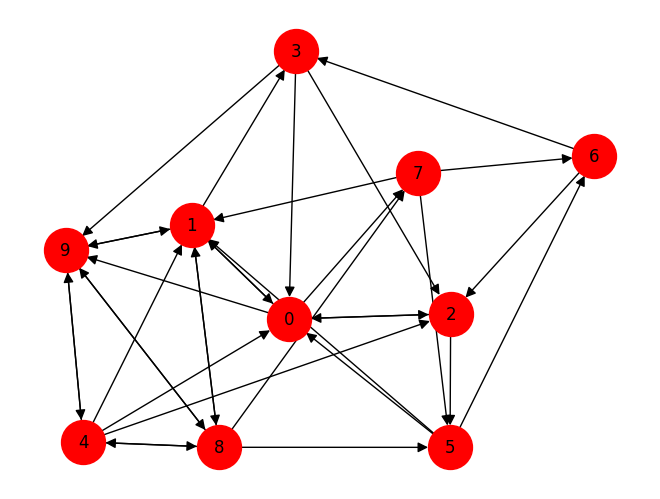

In [329]:
#Case1:-
X=p1_model(a=[0]*10,b=[0]*10,r=0,t=-0.69)

Adjacency matrix(X):-
[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 1. 1. 0. 0. 0.]]
Row Sum(X_i+):-
[5. 2. 3. 4. 4. 2. 4. 4. 3. 5.]
Column Sum(X_+j):-
[8. 6. 7. 4. 2. 5. 2. 0. 1. 1.]
Total(X_++):-
36.0


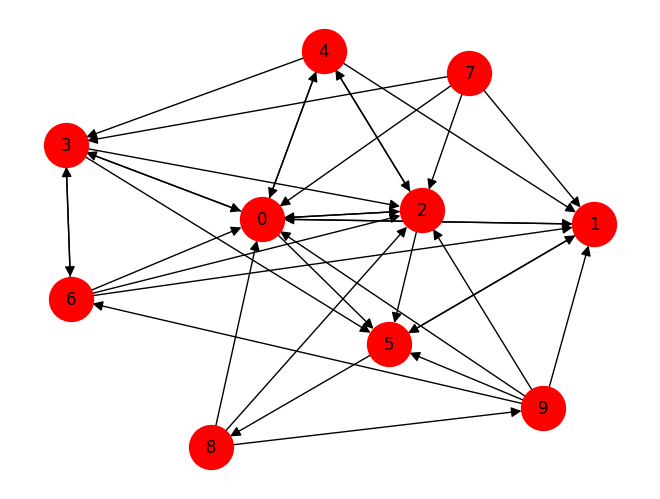

In [317]:
#Case2:-
X=p1_model(a=[0]*10,r=0,t=-0.90,
b=[1.5,1.5,1.5,0,0,0,0,-1.5,-1.5,-1.5])

Adjacency matrix(X):-
[[0. 1. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 0.]]
Row Sum(X_i+):-
[3. 4. 4. 1. 2. 3. 2. 1. 2. 5.]
Column Sum(X_+j):-
[2. 4. 8. 0. 3. 2. 3. 1. 2. 2.]
Total(X_++):-
27.0


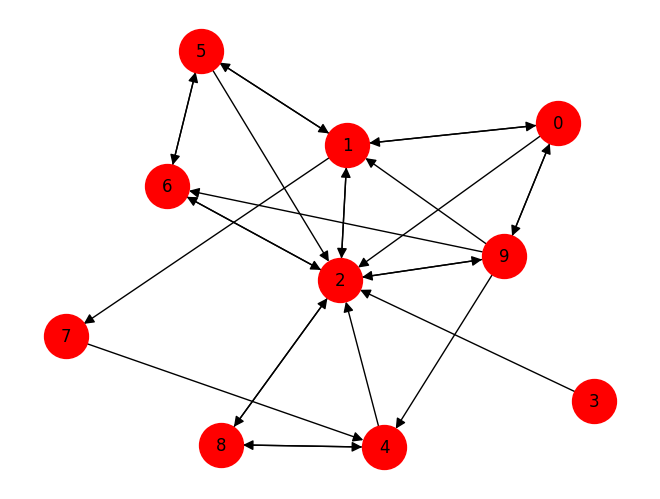

In [318]:
#Case3:-
X=p1_model(a=[0]*10,r=2,t=-1.67,
b=[1.5,1.5,1.5,0,0,0,0,-1.5,-1.5,-1.5])

Adjacency matrix(X):-
[[0. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 1. 0.]]
Row Sum(X_i+):-
[5. 1. 2. 2. 4. 4. 4. 3. 4. 4.]
Column Sum(X_+j):-
[4. 7. 5. 3. 3. 2. 4. 3. 2. 0.]
Total(X_++):-
33.0


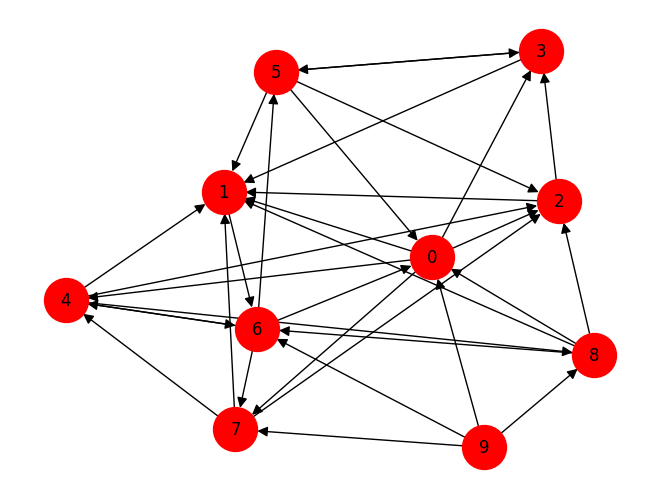

In [325]:
#Case4:-
X=p1_model(a=[0]*10,r=-2,t=-0.42,
b=[1.5,1.5,1.5,0,0,0,0,-1.5,-1.5,-1.5])